Connected to robotics-in-agriculture-research (Python 3.12.11)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
# Set plot style
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [ ]:
DATA_PATH = "data/raw/crop_yield.csv"
df = pd.read_csv(DATA_PATH)

In [ ]:
# --- 1. Basic Data Inspection ---
print("--- First 5 rows ---")
print(df.head())

--- First 5 rows ---
           Crop  Crop_Year       Season  State     Area  Production  \
0      Arecanut       1997  Whole Year   Assam  73814.0       56708   
1     Arhar/Tur       1997  Kharif       Assam   6637.0        4685   
2   Castor seed       1997  Kharif       Assam    796.0          22   
3      Coconut        1997  Whole Year   Assam  19656.0   126905000   
4  Cotton(lint)       1997  Kharif       Assam   1739.0         794   

   Annual_Rainfall  Fertilizer  Pesticide        Yield  
0           2051.4  7024878.38   22882.34     0.796087  
1           2051.4   631643.29    2057.47     0.710435  
2           2051.4    75755.32     246.76     0.238333  
3           2051.4  1870661.52    6093.36  5238.051739  
4           2051.4   165500.63     539.09     0.420909  


In [ ]:
print("\n--- Data Info ---")
print(df.info())


--- Data Info ---
<class 'pandas.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  str    
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  str    
 3   State            19689 non-null  str    
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), str(3)
memory usage: 1.5 MB
None


In [ ]:
print("\n--- Summary Statistics ---")
print(df.describe())


--- Summary Statistics ---
          Crop_Year          Area    Production  Annual_Rainfall  \
count  19689.000000  1.968900e+04  1.968900e+04     19689.000000   
mean    2009.127584  1.799266e+05  1.643594e+07      1437.755177   
std        6.498099  7.328287e+05  2.630568e+08       816.909589   
min     1997.000000  5.000000e-01  0.000000e+00       301.300000   
25%     2004.000000  1.390000e+03  1.393000e+03       940.700000   
50%     2010.000000  9.317000e+03  1.380400e+04      1247.600000   
75%     2015.000000  7.511200e+04  1.227180e+05      1643.700000   
max     2020.000000  5.080810e+07  6.326000e+09      6552.700000   

         Fertilizer     Pesticide         Yield  
count  1.968900e+04  1.968900e+04  19689.000000  
mean   2.410331e+07  4.884835e+04     79.954009  
std    9.494600e+07  2.132874e+05    878.306193  
min    5.417000e+01  9.000000e-02      0.000000  
25%    1.880146e+05  3.567000e+02      0.600000  
50%    1.234957e+06  2.421900e+03      1.030000  
75%    1.

In [ ]:
print("\n--- Missing Values ---")
print(df.isnull().sum())


--- Missing Values ---
Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64


In [ ]:
print(f"\n--- Duplicate Rows: {df.duplicated().sum()} ---")


--- Duplicate Rows: 0 ---


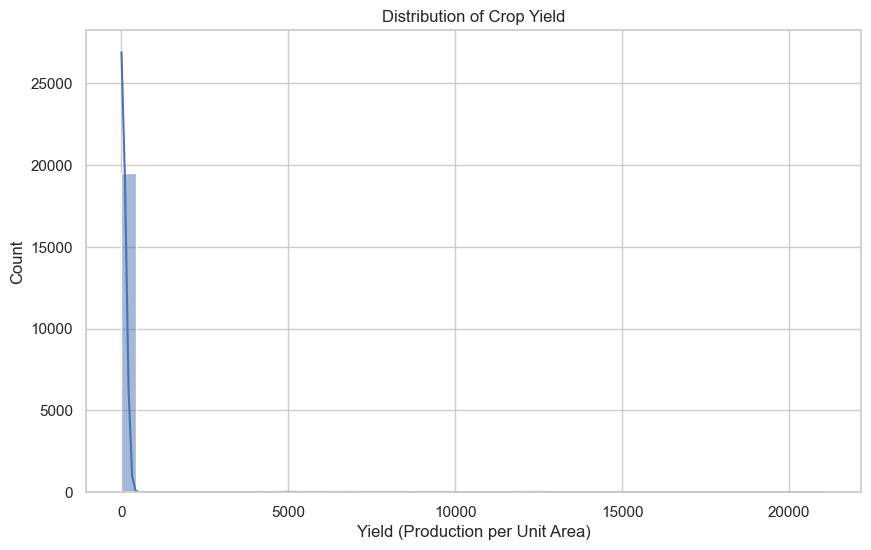

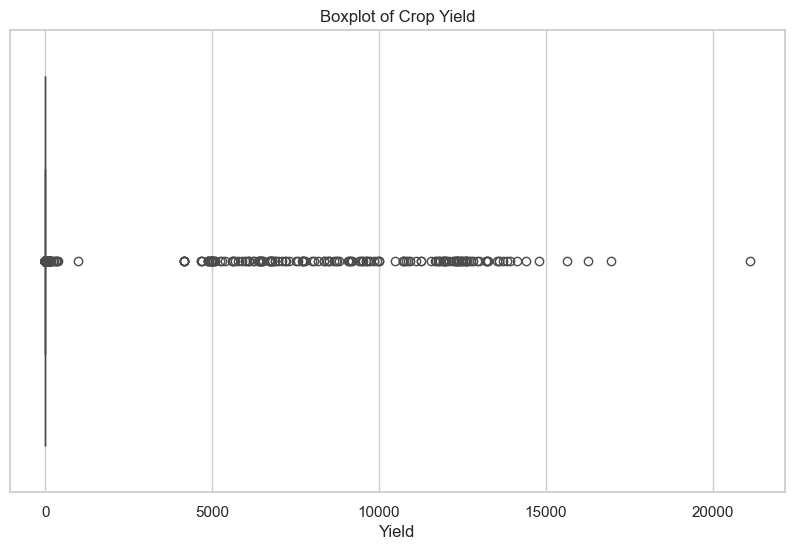

In [ ]:
# --- 2. Target Variable Analysis (Yield) ---
plt.figure(figsize=(10, 6))
sns.histplot(df["Yield"], bins=50, kde=True)
plt.title("Distribution of Crop Yield")
plt.xlabel("Yield (Production per Unit Area)")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df["Yield"])
plt.title("Boxplot of Crop Yield")
plt.show()

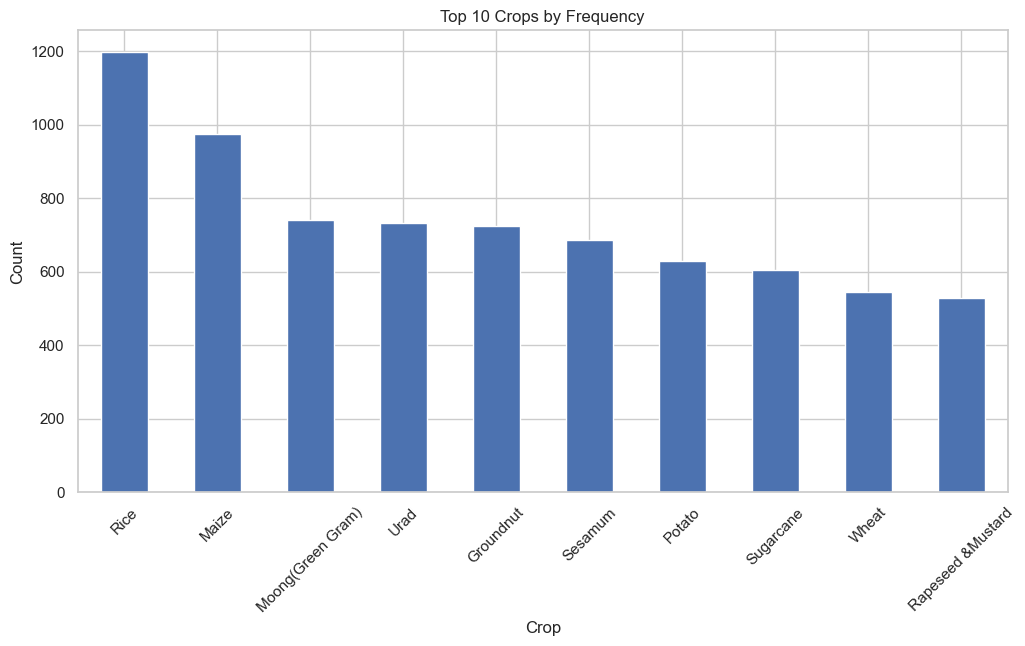

In [ ]:
# --- 3. Categorical Feature Analysis ---
# Top 10 Crops by frequency
plt.figure(figsize=(12, 6))
df["Crop"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Crops by Frequency")
plt.xlabel("Crop")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

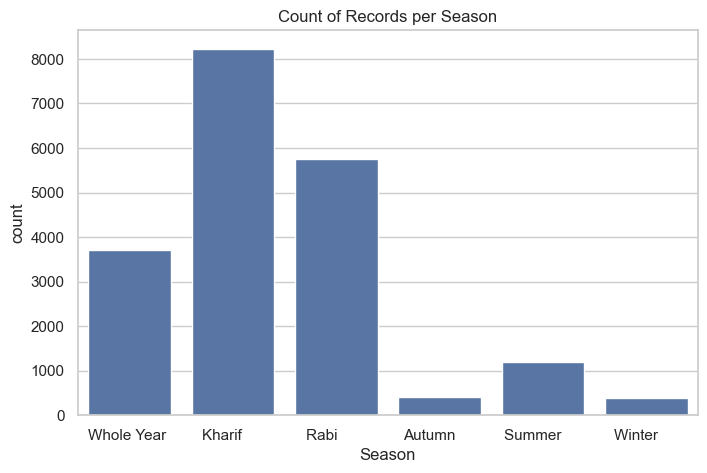

In [ ]:
# Distribution of Seasons
plt.figure(figsize=(8, 5))
sns.countplot(x="Season", data=df)
plt.title("Count of Records per Season")
plt.show()

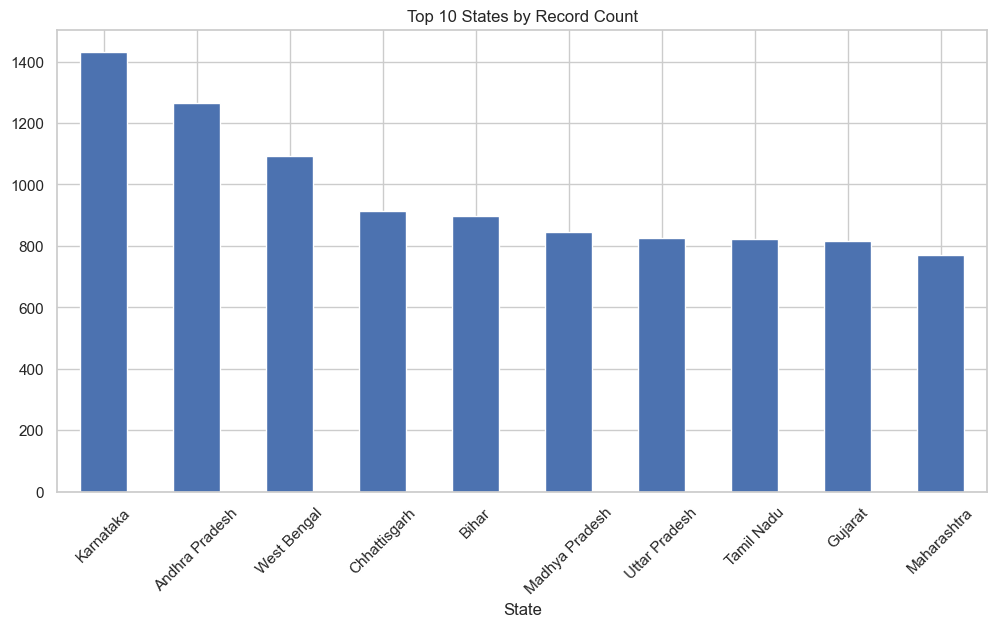

In [ ]:
# Top 10 States by frequency
plt.figure(figsize=(12, 6))
df["State"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 States by Record Count")
plt.xticks(rotation=45)
plt.show()

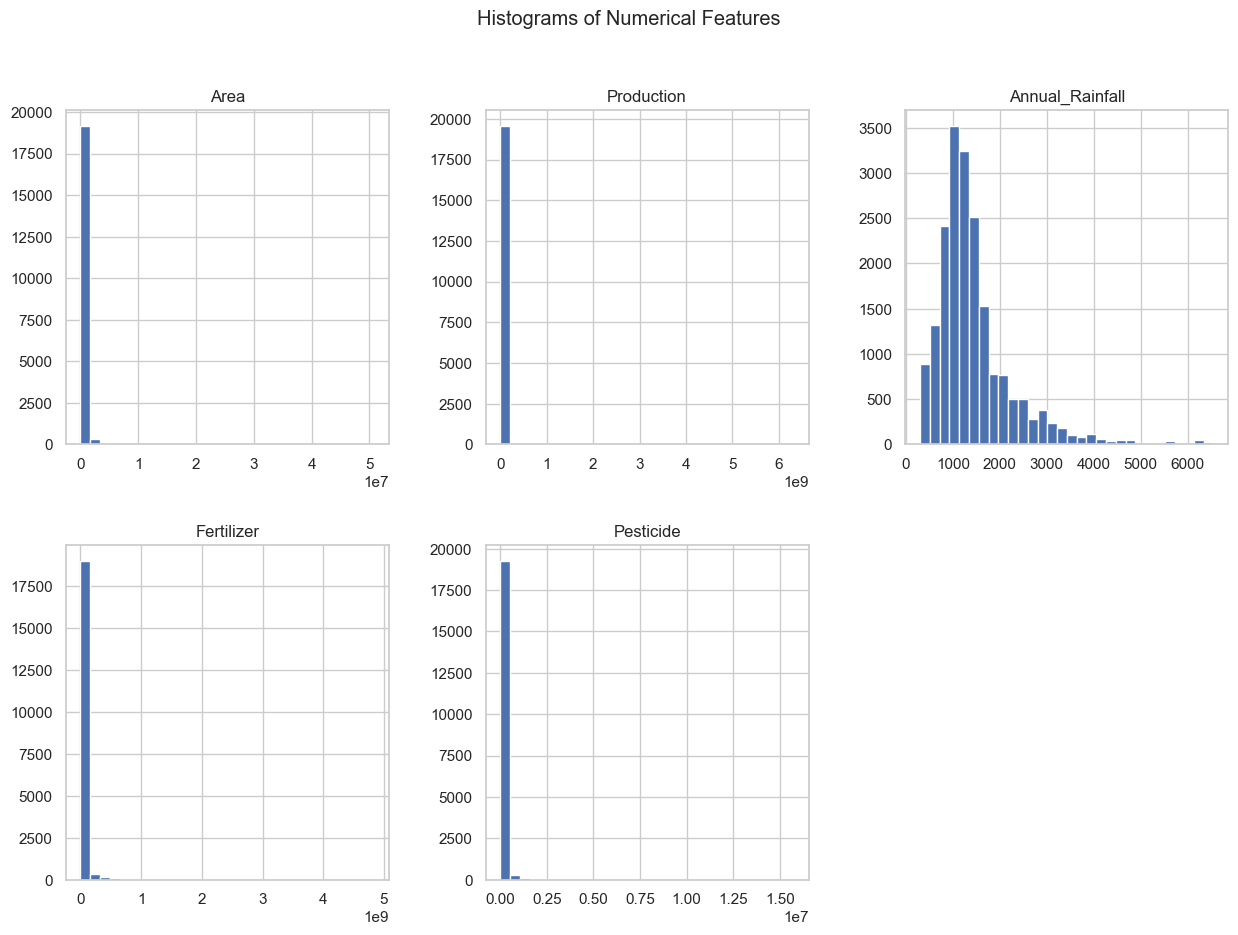

In [ ]:
# --- 4. Numerical Feature Analysis ---
numerical_cols = ["Area", "Production", "Annual_Rainfall", "Fertilizer", "Pesticide"]
df[numerical_cols].hist(bins=30, figsize=(15, 10), layout=(2, 3))
plt.suptitle("Histograms of Numerical Features")
plt.show()

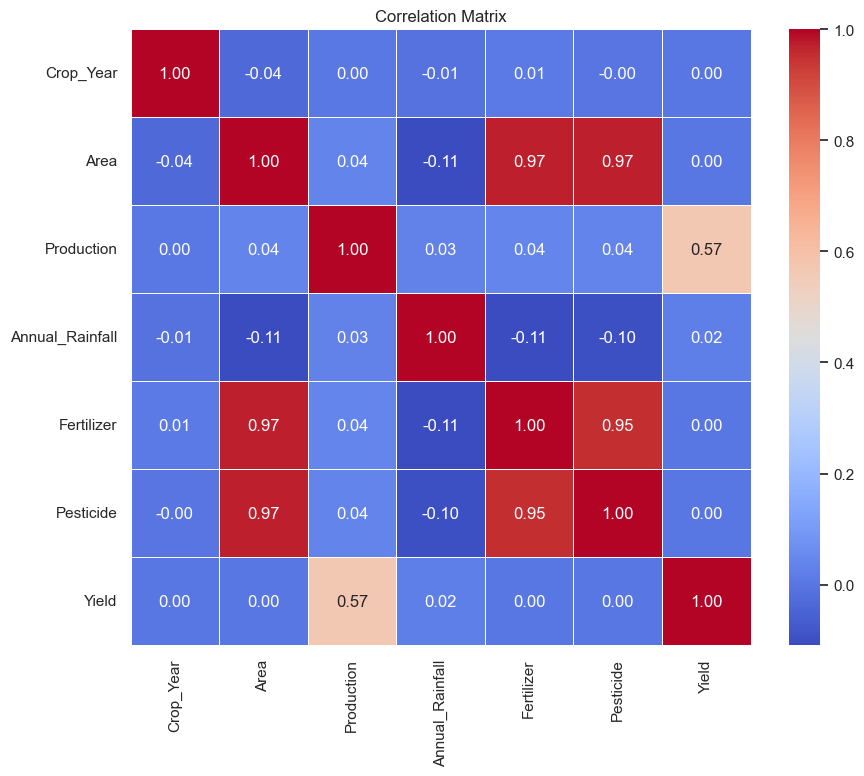

In [ ]:
# --- 5. Bivariate Analysis (Correlations) ---
# Correlation Matrix
plt.figure(figsize=(10, 8))
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

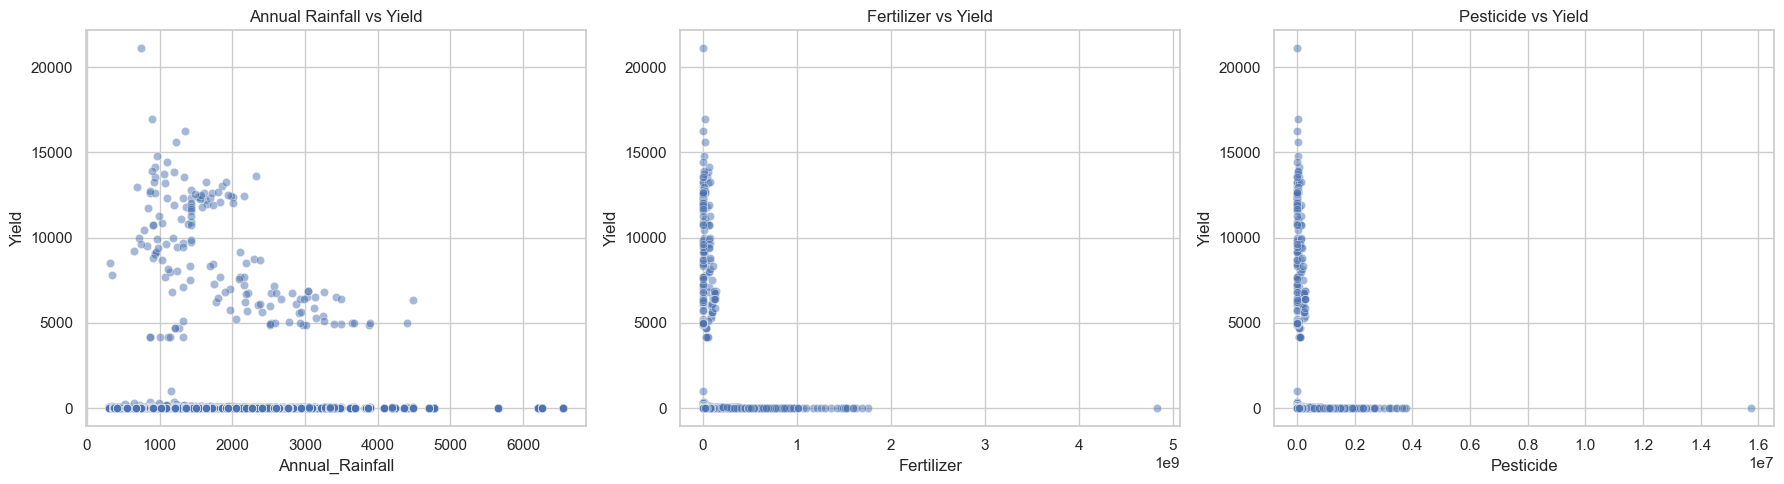

In [ ]:
# Scatter plots: Key Inputs vs Yield
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(x="Annual_Rainfall", y="Yield", data=df, ax=axes[0], alpha=0.5)
axes[0].set_title("Annual Rainfall vs Yield")

sns.scatterplot(x="Fertilizer", y="Yield", data=df, ax=axes[1], alpha=0.5)
axes[1].set_title("Fertilizer vs Yield")

sns.scatterplot(x="Pesticide", y="Yield", data=df, ax=axes[2], alpha=0.5)
axes[2].set_title("Pesticide vs Yield")

plt.tight_layout()
plt.show()

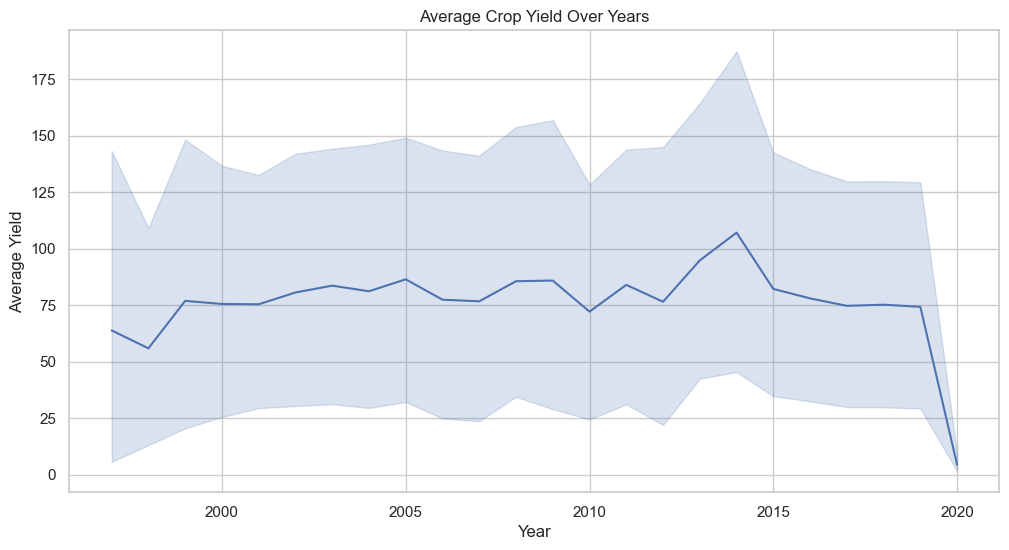

In [ ]:
# --- 6. Temporal Analysis (Yield over Years) ---
plt.figure(figsize=(12, 6))
sns.lineplot(x="Crop_Year", y="Yield", data=df)  # aggregations default to mean with ci
plt.title("Average Crop Yield Over Years")
plt.xlabel("Year")
plt.ylabel("Average Yield")
plt.show()

In [ ]:
# --- 7. Yield by State (Top 10) ---
# Calculate average yield per state and sort
avg_yield_by_state = (
    df.groupby("State")["Yield"].mean().sort_values(ascending=False).head(15)
)

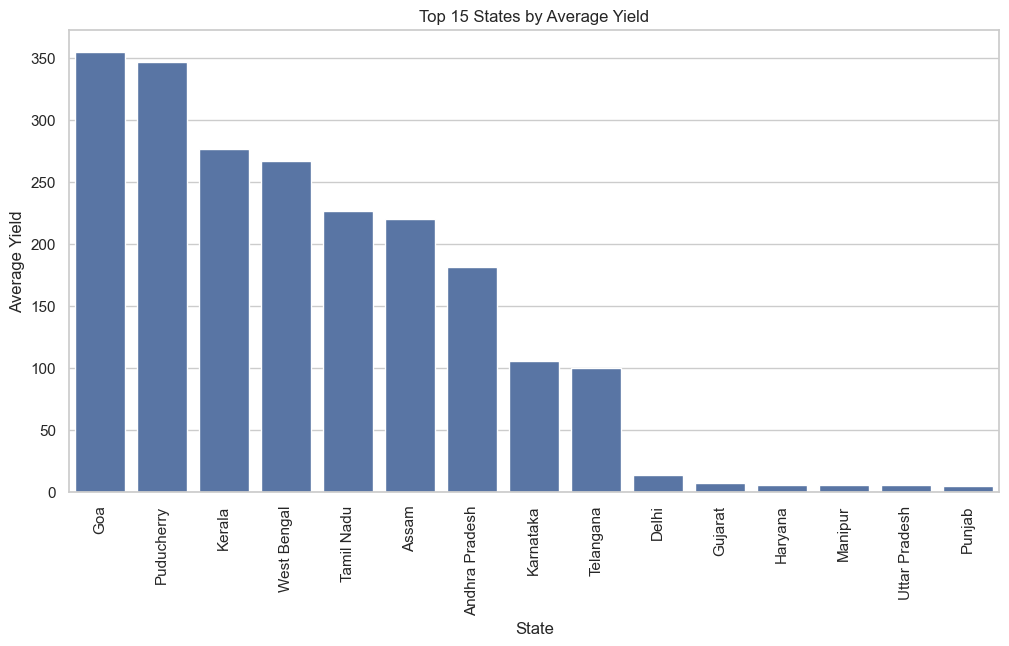

In [ ]:
# --- 7. Yield by State (Top 10) ---
# Calculate average yield per state and sort
avg_yield_by_state = (
    df.groupby("State")["Yield"].mean().sort_values(ascending=False).head(15)
)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_yield_by_state.index, y=avg_yield_by_state.values)
plt.title("Top 15 States by Average Yield")
plt.xticks(rotation=90)
plt.ylabel("Average Yield")
plt.show()